# Classificação com Árvore de Decisão e Naive Bayes

Funcionamento de dois modelos supervisionados do `scikit-learn`: **Árvore de Decisão** e **Naive Bayes**, utilizando o conjunto de dados *Play Tennis*.

In [5]:
#Importar bibliotecas

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Carregar os dados *Play Tennis*

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df.head()

#Pré-processamento: codificar variáveis categóricas

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Gráficos: Relação entre Atributos e Decisão

Frequência de cada atributo para *Play Tennis*

**Outlook**: Quando o tempo está *Overcast*, a maioria das decisões é jogar tênis (Yes). Já com tempo *Sunny*, a maioria das decisões é não jogar (No).

**Temperature**: Temperaturas *Cool* e *Mild* parecem estar mais associadas com a decisão de jogar tênis, enquanto *Hot* tem uma leve tendência ao não.

**Humidity**: Umidade *High* está relacionada com a maioria dos "Não" (No), enquanto *Normal* favorece o "Sim" (Yes).

**Wind**: Quando o vento é *Weak* (fraco), mais partidas de tênis acontecem. Quando é *Strong* (forte), há mais casos de não jogar.


Esses gráficos ajudam a visualizar como cada atributo impacta a decisão!

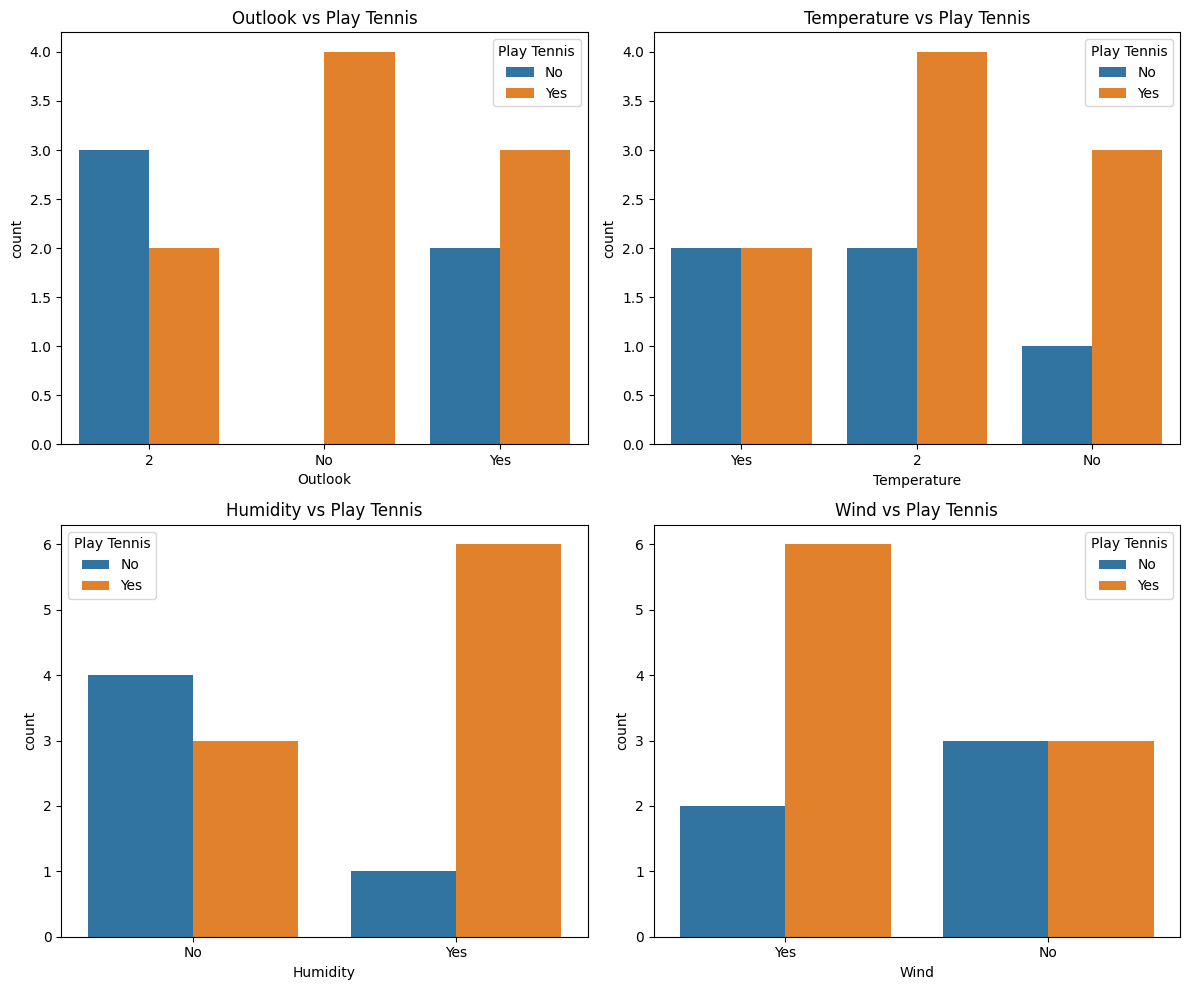

In [9]:


plt.figure(figsize=(12,10))

for i, col in enumerate(['Outlook', 'Temperature', 'Humidity', 'Wind']):
    plt.subplot(2,2,i+1)
    sns.countplot(x=col, hue='Play Tennis', data=df.replace({0:'No', 1:'Yes'}))
    plt.title(f'{col} vs Play Tennis')

plt.tight_layout()
plt.show()



#Treinamento dos modelos

In [13]:
#Modelo 1: Árvore de Decisão


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#Modelo 2: Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


#Avaliação do modelo de classificação
Relatório de métricas

In [14]:
print(f'Acurácia da Árvore de Decisão: {accuracy_score(y_test, y_pred_dt):.2f}')
print(classification_report(y_test, y_pred_dt))

print(f'Acurácia do Naive Bayes: {accuracy_score(y_test, y_pred_nb):.2f}')
print(classification_report(y_test, y_pred_nb))

Acurácia da Árvore de Decisão: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Acurácia do Naive Bayes: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



#Visualização da árvore

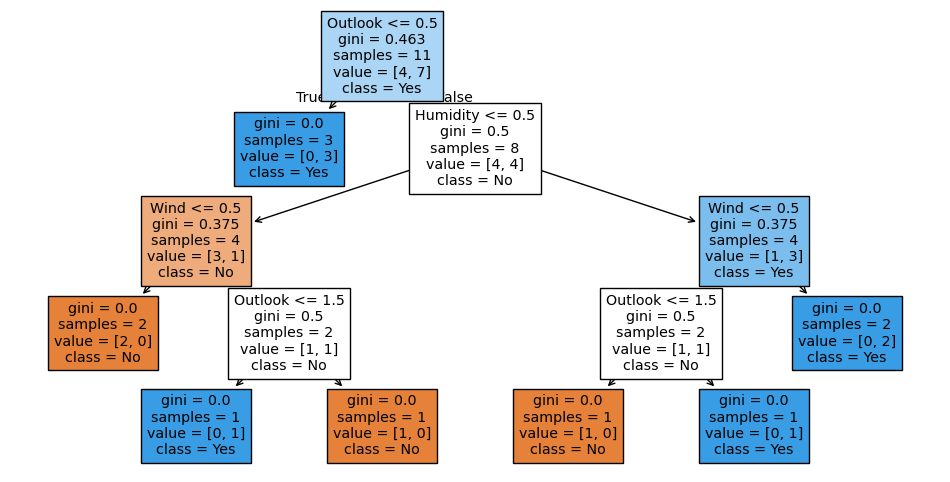

In [15]:
#Visualizar a Árvore

plt.figure(figsize=(12,6))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

#Quando empregar cada modelo

    *Árvore de Decisão
        Quando deseja um modelo fácil de interpretar e explicar.
        Quando as relações entre os atributos são complexas.

    *Naive Bayes
        Quando precisa de um modelo rápido e simples.
        Quando as caracteristicas são "mais" independentes.
